In [41]:
from model import Model
from plot_vp import plot_vp
from policy_iteration import policy_iteration
from value_iteration import value_iteration, value_iteration_async
from sarsa import sarsa
from q_learning import q_learning
from world_config import cliff_world, grid_world, small_world

## Policy Iteration

In [2]:
model = Model(grid_world)
V, pi = policy_iteration(model)

  9%|▉         | 9/100 [00:06<01:09,  1.32it/s]

breaking


(<Figure size 1440x1080 with 2 Axes>, <Axes: >)

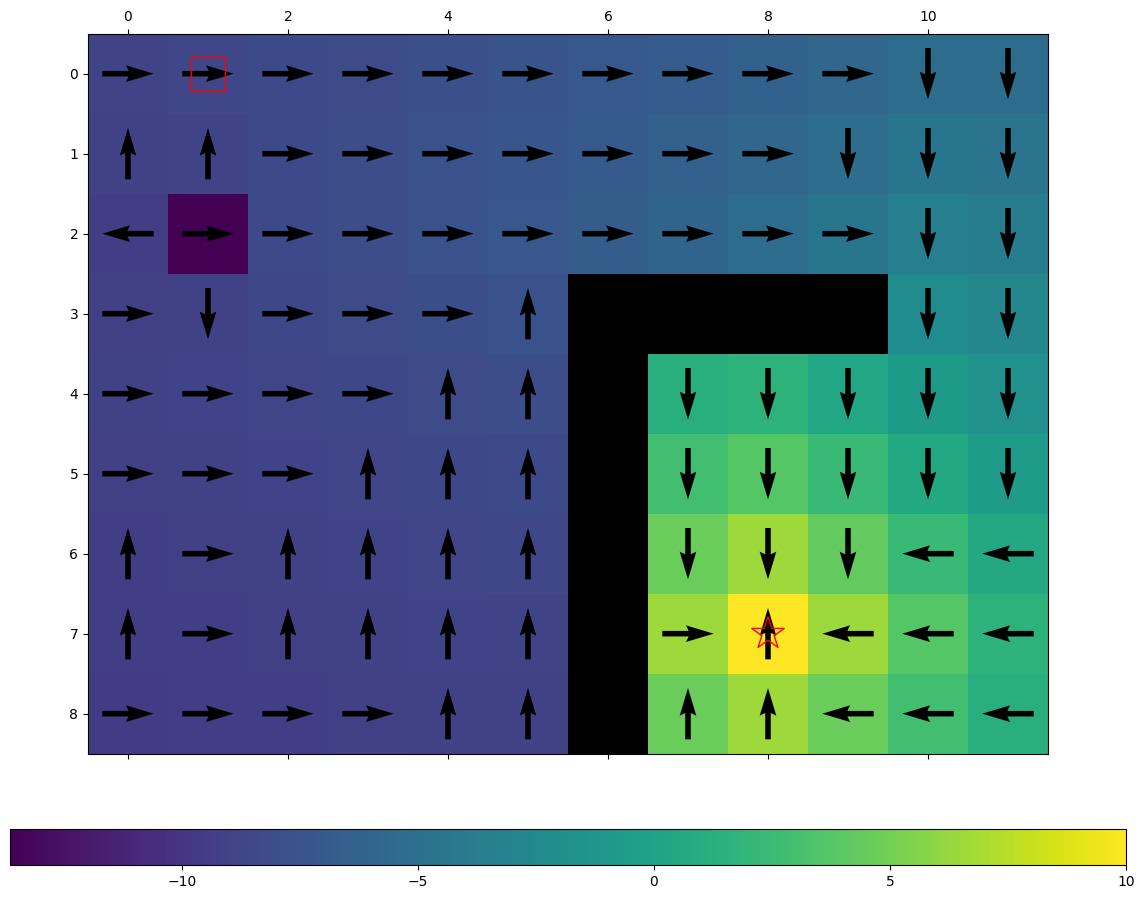

In [3]:
plot_vp(model, V, pi)

## Q1 - Value Iteration

### 1. Sychronize

In [4]:
model = Model(grid_world)
V, pi = value_iteration(model)

 33%|███▎      | 33/100 [00:08<00:16,  4.11it/s]


(<Figure size 1440x1080 with 2 Axes>, <Axes: >)

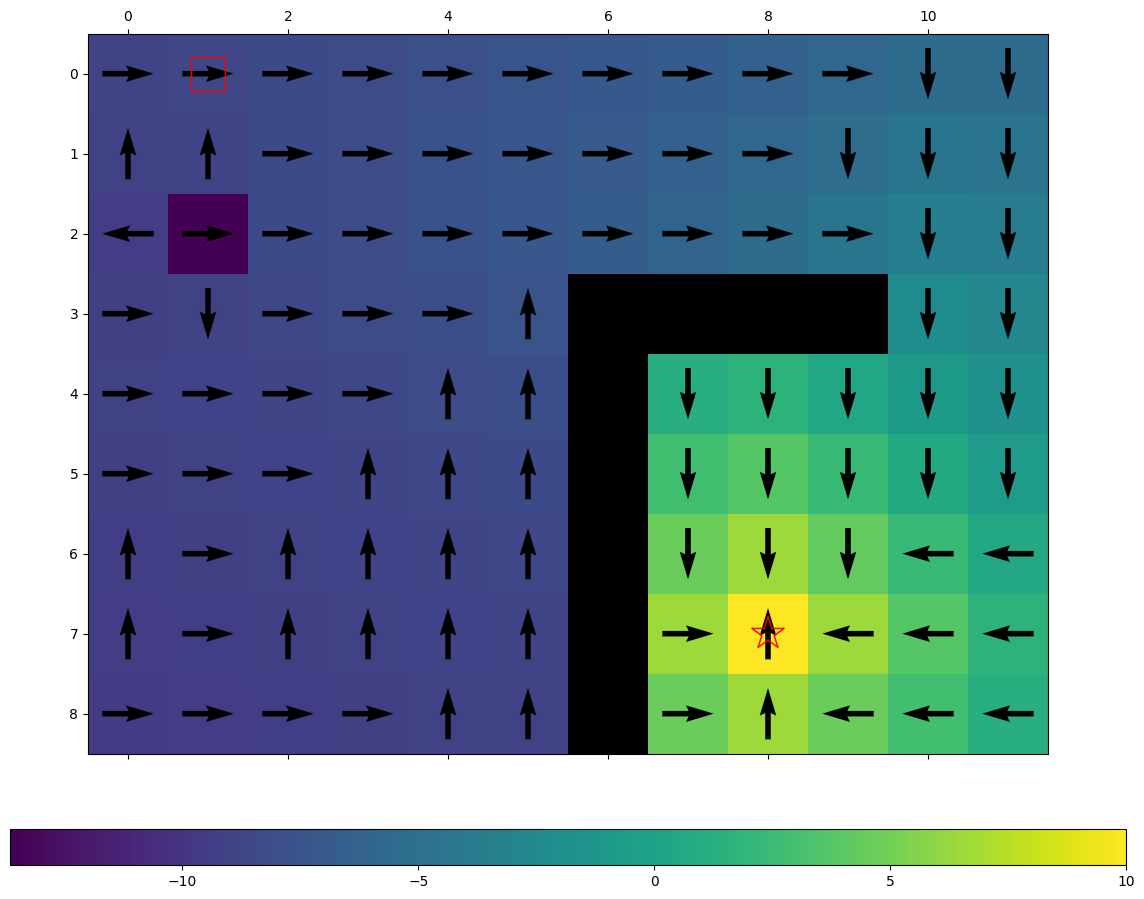

In [5]:
plot_vp(model, V, pi)

### 2. Asychonize

 26%|██▌       | 26/100 [00:06<00:18,  4.07it/s]


(<Figure size 1440x1080 with 2 Axes>, <Axes: >)

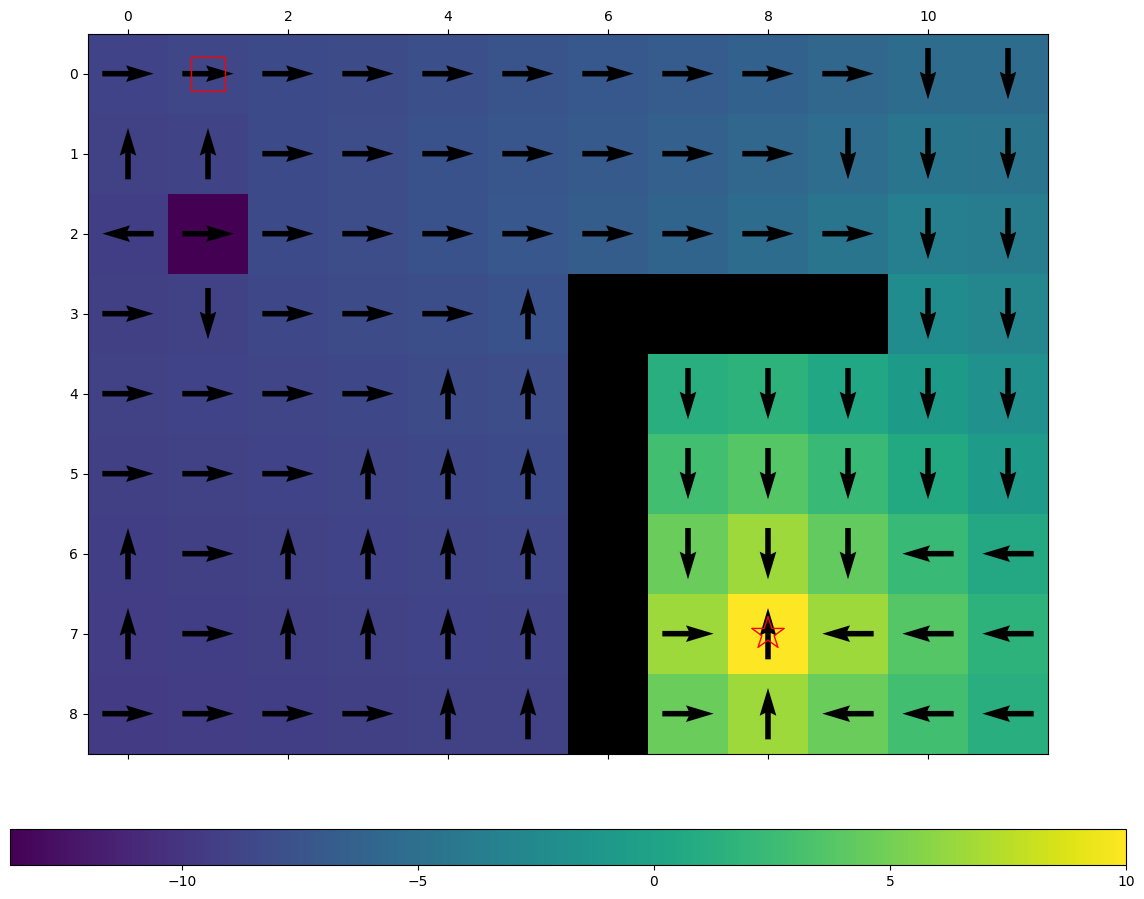

In [6]:
V_async, pi_async = value_iteration_async(model)
plot_vp(model, V_async, pi_async)

## Q2 - SARSA

100%|██████████| 1000/1000 [00:00<00:00, 11133.12it/s]


(<Figure size 480x480 with 2 Axes>, <Axes: >)

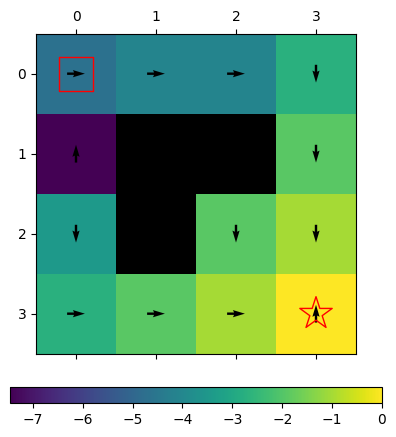

In [55]:
model = Model(small_world)
V, pi = sarsa(model, maxit=1000)
plot_vp(model, V, pi)

## Q3 - Q-Learning

100%|██████████| 1000/1000 [00:00<00:00, 16863.69it/s]


(<Figure size 480x480 with 2 Axes>, <Axes: >)

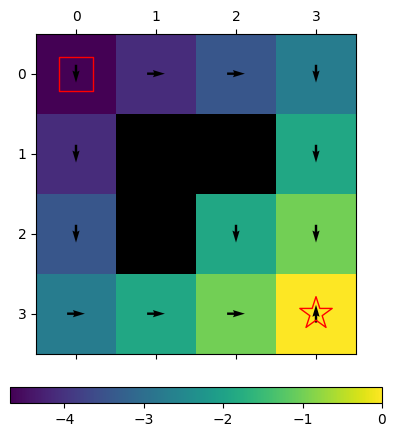

In [60]:
model = Model(small_world)
V, pi = q_learning(model, alpha=1., maxit=1000)
plot_vp(model, V, pi)